In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
pip install --upgrade pandas

In [4]:
pd.__version__

'2.2.1'

In [5]:
train_path = "train_data.txt"


In [6]:
train_movie = pd.read_csv("train_data.txt", header=None, sep=":::", names=["ID","Title", "Genres","Description"], engine='python')

In [7]:
train_movie

,ID,Title,Genres,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
11175,11176,Gokudô no onna-tachi (1986),crime,"While her husband is in prison doing time, Ta..."
11176,11177,Les rendez-vous d'Anna (1978),drama,"Anna, a detached and diffident director, arri..."
11177,11178,Chipurile deltei (2006),documentary,The Danube Delta. The modern era slowly creep...
11178,11179,La pisseuse (1997),short,This is the great day for her: she has an imp...


In [8]:
train_movie.head()

,ID,Title,Genres,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [9]:
train_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11180 entries, 0 to 11179
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           11180 non-null  int64 
 1   Title        11180 non-null  object
 2   Genres       11179 non-null  object
 3   Description  11179 non-null  object
dtypes: int64(1), object(3)
memory usage: 349.5+ KB


In [10]:
train_movie.duplicated().sum()

0

In [11]:
train_movie.describe(include='object').T


,count,unique,top,freq
Title,11180,11180,Oscar et la dame rose (2009),1
Genres,11179,27,drama,2751
Description,11179,11172,Award of the American academy of cinematograp...,3


In [12]:
train_movie['Genres'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war ', nan], dtype=object)

In [13]:
train_movie.describe()

,ID
count,11180.000000
mean,5590.500000
std,3227.532339
min,1.000000
25%,2795.750000
50%,5590.500000
75%,8385.250000
max,11180.000000


In [14]:
test_path = "test_data.txt"


In [15]:
test_data = pd.read_csv("test_data.txt", header=None, sep=":::", names=["ID","Title", "Genres","Description"], engine='python')


In [16]:
test_data.head()

,ID,Title,Genres,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


In [17]:
test_data.duplicated().sum()


0

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
pip install langdetect


  Using cached langdetect-1.0.9-py3-none-any.whl


In [20]:
train_path = "train_data.txt"


<ipython-input-21-c5ab81640f9e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=train_movie,x='Genres',order=train_movie.Genres.value_counts().index,palette='rocket')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:94

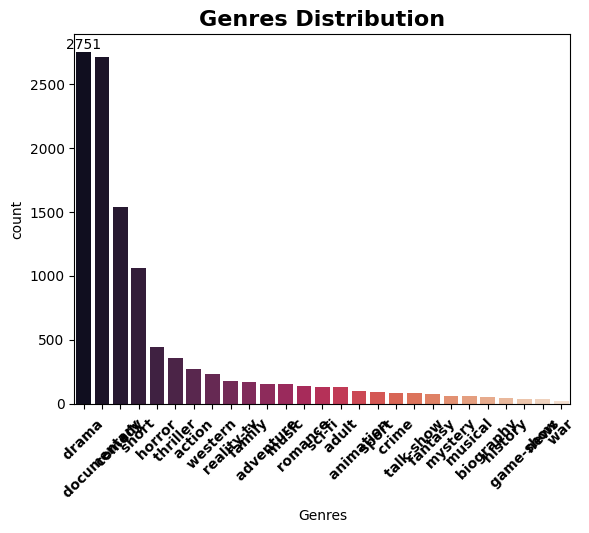

In [21]:
ax=sns.countplot(data=train_movie,x='Genres',order=train_movie.Genres.value_counts().index,palette='rocket')
ax.bar_label(ax.containers[0])
plt.title('Genres Distribution',fontweight='bold',fontsize=16)
plt.xticks(rotation=45,fontweight='bold',fontsize=10)
plt.show()

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'train_movie' is your training dataset and 'test_data' is your test dataset
train_movie = pd.read_csv("train_data.txt", header=None, sep=":::", names=["ID","Title", "Genres","Description"], engine='python')
test_data = pd.read_csv("test_data.txt", header=None, sep=":::", names=["ID","Title", "Genres","Description"], engine='python')

# Convert 'Description' column to string
train_movie['Description'] = train_movie['Description'].astype(str)
test_data['Description'] = test_data['Description'].astype(str)

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=2)

# Fit and transform the training data
x_train = tfidf_vectorizer.fit_transform(train_movie['Description'])

# Transform the test data
x_test = tfidf_vectorizer.transform(test_data['Description'])


In [23]:
# Using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase=True, #Lowercase chars
                                   ngram_range=(1,1), #Capture only single words in each text(unigrams)
                                   stop_words='english',#Remove stop_words
                                   min_df=2)#Ignore words that appears less than 2 times
x_train = tfidf_vectorizer.fit_transform(train_movie['Description'])
x_test = tfidf_vectorizer.transform(test_data['Description'])

In [24]:
pip install imbalanced-learn


In [25]:
from imblearn.over_sampling import RandomOverSampler

In [26]:
sampler = RandomOverSampler()
#We will pass to it the output of TfidfVectorizer from train data
x_train_resampled , y_train_resampled = sampler.fit_resample(x_train,train_movie['Genres'])

<ipython-input-27-a13181e41e9a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=y_train_resampled_df, x='Genres', palette='rocket')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a

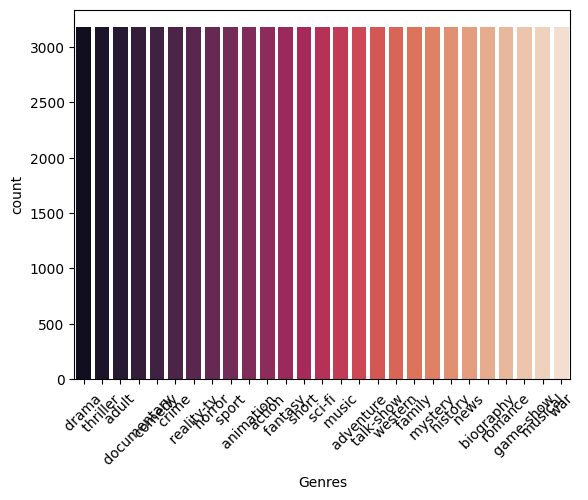

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert y_train_resampled to a DataFrame
y_train_resampled_df = pd.DataFrame({'Genres': y_train_resampled})

# Plot the countplot
sns.countplot(data=y_train_resampled_df, x='Genres', palette='rocket')
plt.xticks(rotation=45)
plt.show()


In [28]:
print('Train :',x_train_resampled.shape[0])
print('Test :',y_train_resampled.shape[0])

Train : 85887
Test : 85887


In [29]:
y_actual = pd.read_csv("test_data_solution.txt", sep=':::',usecols=[2],header=None).rename(columns={2:'Actual_Genre'})
y_actual.head()

<ipython-input-29-7f44e3f90637>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  y_actual = pd.read_csv("test_data_solution.txt", sep=':::',usecols=[2],header=None).rename(columns={2:'Actual_Genre'})


,Actual_Genre
0,thriller
1,comedy
2,documentary
3,drama
4,drama


In [32]:
# Using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase=True, #Lowercase chars
                                   ngram_range=(1,1), #Capture only single words in each text(unigrams)
                                   stop_words='english',#Remove stop_words
                                   min_df=2)#Ignore words that appears less than 2 times
x_train = tfidf_vectorizer.fit_transform(train_movie['Description'])
x_test = tfidf_vectorizer.transform(test_data['Description'])

In [34]:
sampler = RandomOverSampler()
#We will pass to it the output of TfidfVectorizer from train data
x_train_resampled , y_train_resampled = sampler.fit_resample(x_train,train_movie['Genres'])

In [42]:
# Assuming y_actual is the true labels for x_test
y_actual = y_pred

# Align y_actual with y_pred based on the indices of x_test
y_actual = y_actual[:len(y_pred)]

# Now you can calculate accuracy
print('Accuracy :',accuracy_score(y_actual,y_pred))


Accuracy : 1.0
